### Data from WEB

#### Here, we will show how to get any information from web

In [9]:
#!pip install requests

In [5]:
## first I need to import the library requests and then I use pandas to transform the datas 
## from web to dataframe
import requests
import pandas as pd

#### 1-Data from cryptowatch

I would like to visualize the prices of bitfinex at the last 7 days on all market prices :

first time, I connect to the site : https://cryptowat.ch/fr-fr/home;
And then, go on right to find the link : click on access API to find Rest API;
When it's done, let's go to the bottom to find : https://api.cryptowat.ch/markets/bitfinex

curl "https://api.cryptowat.ch/markets/bitfinex/btcusd/ohlc"

In [2]:
def get_historic_price(symbol, exchange='bitfinex', after='2022-01-01'):
    url='https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp=requests.get(url, params={'periods':'3600',
                                  'after':str(int(pd.Timestamp(after).timestamp()))
                                  })
    resp.raise_for_status()
    data=resp.json()
    df=pd.DataFrame(data['result']['3600'],columns=[
        'CloseTime','OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice','Volume','NA'])
    df['CloseTime']=pd.to_datetime(df['CloseTime'],unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [11]:
last_week=(pd.Timestamp.now()-pd.offsets.Day(7))
last_week
df=get_historic_price('btc', 'bitstamp', after=last_week)

In [9]:
#!pip install matplotlib

In [10]:
import numpy as np
import matplotlib.pyplot as plt

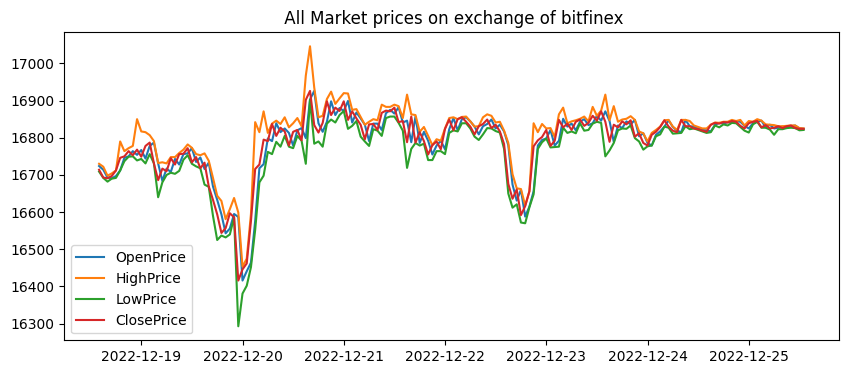

In [22]:
plt.figure(figsize=(10,4))
plt.plot(df['OpenPrice'],label='OpenPrice')
plt.plot(df['HighPrice'],label='HighPrice')
plt.plot(df['LowPrice'],label='LowPrice')
plt.plot(df['ClosePrice'],label='ClosePrice')
plt.title(" All Market prices on exchange of bitfinex")
plt.legend()

### 2021-22 NBA Player Stats: Per Game

https://www.basketball-reference.com/leagues/NBA_2022_per_game.html

In [1]:
! pip install lxml

In [2]:
from IPython.core.display import display, HTML

In [23]:
url="https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"

In [20]:
nba_tables=pd.read_html(url)

In [21]:
len(nba_tables)

1

In [22]:
nba_tables[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


### WIKIPEDIA

In [24]:
html_url="https://en.wikipedia.org/wiki/The_Simpsons"

In [25]:
r=requests.get(html_url)
wiki_tables= pd.read_html(r.text, header=0)

In [26]:
len(wiki_tables)

48

In [29]:
wiki_tables

[            The Simpsons                                     The Simpsons.1
 0                    NaN                                                NaN
 1                  Genre  .mw-parser-output .plainlist ol,.mw-parser-out...
 2             Created by                                      Matt Groening
 3               Based on                The Simpsons shortsby Matt Groening
 4           Developed by            James L. Brooks Matt Groening Sam Simon
 5              Voices of  Dan Castellaneta Julie Kavner Nancy Cartwright...
 6   Theme music composer                                       Danny Elfman
 7          Opening theme                               "The Simpsons Theme"
 8           Ending theme                               "The Simpsons Theme"
 9              Composers  Richard Gibbs (1989–1990)Alf Clausen (1990–201...
 10     Country of origin                                      United States
 11     Original language                                            English

In [31]:
simpsons=wiki_tables[1]
simpsons

,Season,Season.1,No. ofepisodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
0,Season,Season,No. ofepisodes,Season premiere,Season finale,Time slot (ET),Avg. viewers(in millions),Most watched episode,Most watched episode
1,Season,Season,No. ofepisodes,Season premiere,Season finale,Time slot (ET),Avg. viewers(in millions),Viewers(millions),Episode title
2,1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,27.8,33.5,"""Life on the Fast Lane"""
3,2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,24.4,33.6,"""Bart Gets an 'F'"""
4,3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 pm,21.8,25.5,"""Colonel Homer"""
5,4,1992–93,22,"September 24, 1992","May 13, 1993",Thursday 8:00 pm,22.4,28.6,"""Lisa's First Word"""
6,5,1993–94,22,"September 30, 1993","May 19, 1994",Thursday 8:00 pm,18.9,24.0,"""Treehouse of Horror IV"""
7,6,1994–95,25,"September 4, 1994","May 21, 1995",Sunday 8:00 pm,15.6,22.2,"""Treehouse of Horror V"""
8,7,1995–96,25,"September 17, 1995","May 19, 1996",Sunday 8:00 pm (Episodes 1–24)Sunday 8:30 pm (...,15.1,19.7,"""Treehouse of Horror VI"""
9,8,1996–97,25,"October 27, 1996","May 18, 1997",Sunday 8:30 pm (Episodes 1–3)Sunday 8:00 pm (E...,14.5,20.9,"""The Springfield Files"""
